# 04_Task_4: Blind source separation

Find code for Blind source separation using independent components (IC) to do the job and create an example. We will put this example in the github repository for the paper.
  
The example below is from [Python Pages.](https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)
  <b> </b>

In [6]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
from scipy import signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys
import io

# to move files from one directory to another
import shutil


import yfinance as yf
from nasdaq_stock import nasdaq_stock as nasdaq_stock
import requests


from pylab import rcParams



# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('../')
import cycles_core as cc
import cycles_plot_core as cpc

In [7]:
from numpy.fft import rfft, irfft, rfftfreq
from scipy import fft

from sklearn.decomposition import FastICA, PCA

In [10]:
# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)           # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size = S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

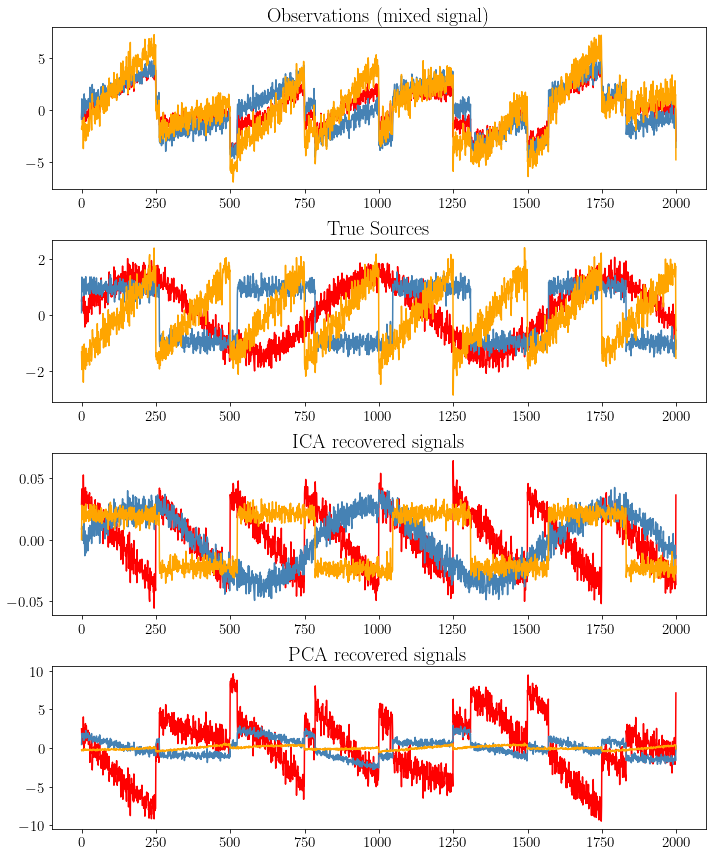

In [66]:
# #############################################################################
# Plot results

rcParams['figure.figsize'] = 10, 12
#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'serif')
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15) # x-small

plt.figure()


models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    # plt.subplots_adjust(wspace = 1)
    # plt.subplots_adjust(hspace = 0.3)
    
    plt.title(name, fontsize=20)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [70]:
s1.shape

(2000,)

In [68]:
S = np.c_[s1, s2, s3]

(2000, 3)